<a href="https://colab.research.google.com/github/YuliiaUtkina/Git_modul_pyhton/blob/main/Copy_of_hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/yulu_rental.csv')

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

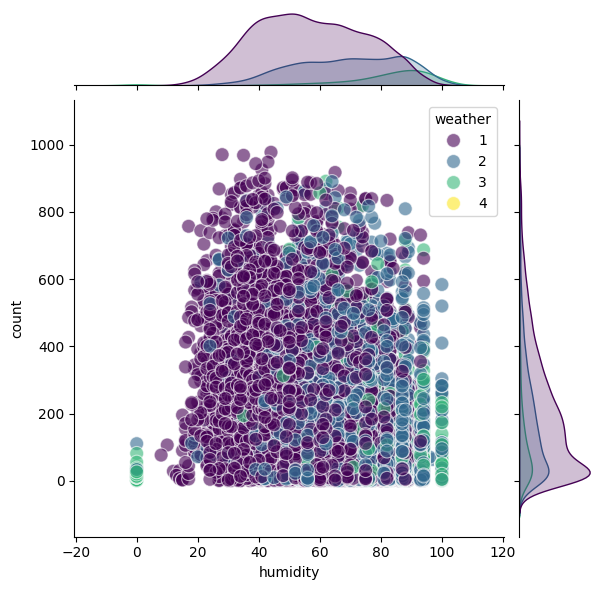

In [6]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather', palette='viridis', kind='scatter', s=100, alpha=0.6);

**Висновок**:
Більш всього орендуюсь велосипеди в хорошу погоду - сонячну та мало хмарну. Необхідно забезпечити належну кількість велосипедів у високий сезон.
В дощ або в сніг можна взагалі не працювати, щоб зберегти гроші на заробітну плату продавцям. Взимку взагалі не варто орендувати місце/майданчик для бізнесу велопрокату.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

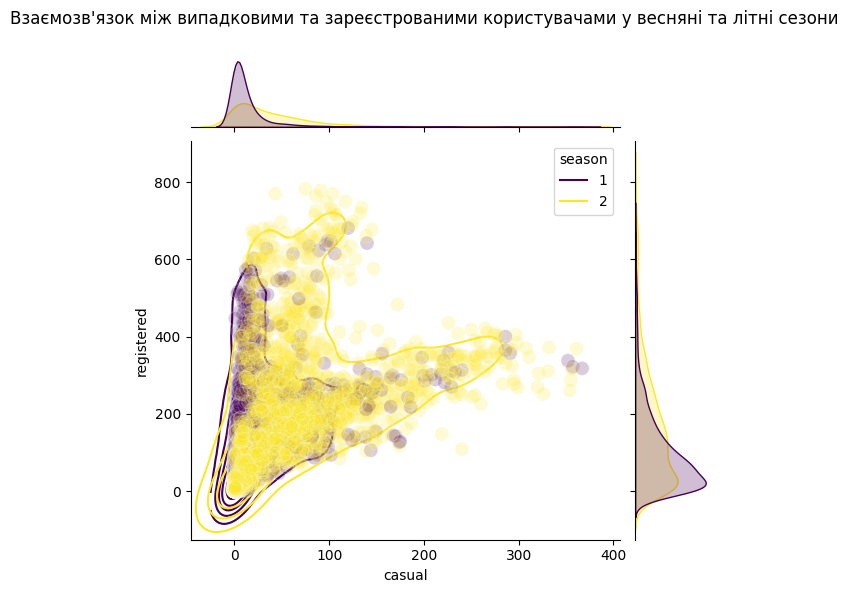

In [13]:
# Відфільтровуємо дані для весни і літа
spring_summer_df = df[df['season'].isin([1, 2])]

# Візуалізація даних
g = sns.jointplot(x="casual", y="registered", data=spring_summer_df, kind="scatter", hue="season", palette="viridis", s=100, alpha=0.2)
g.plot_joint(sns.kdeplot, zorder=0, levels=6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Взаємозв\'язок між випадковими та зареєстрованими користувачами у весняні та літні сезони')
plt.show()

**Висновок**:
Літом обидві групи користувачів все ж таки більш активні, ніж весною. Це може бути пов'язано не тільки з погодними умовами, а з канікулами та відпустками.
Можна розробляти цільові промоакції для залучення випадкових користувачів в періоди високої активності зареєстрованих користувачів, особливо в літній сезон.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


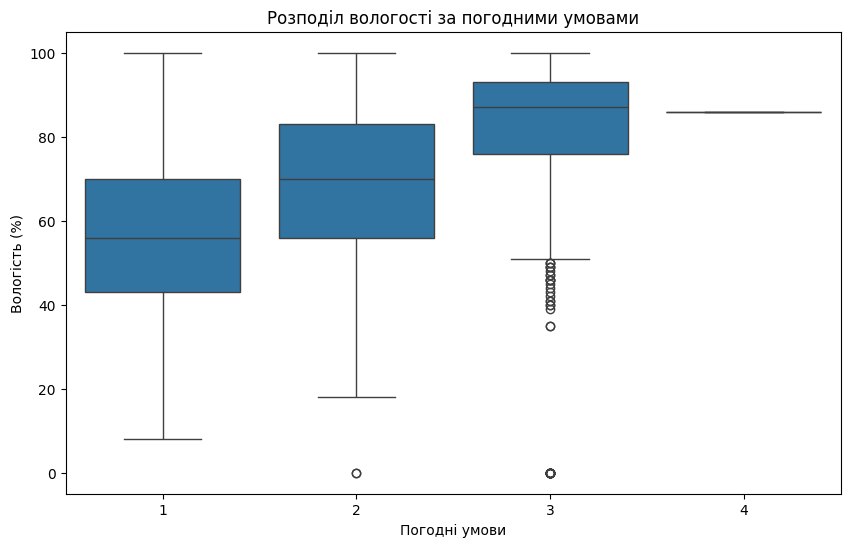

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='humidity', data=df)
plt.title('Розподіл вологості за погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Вологість (%)')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

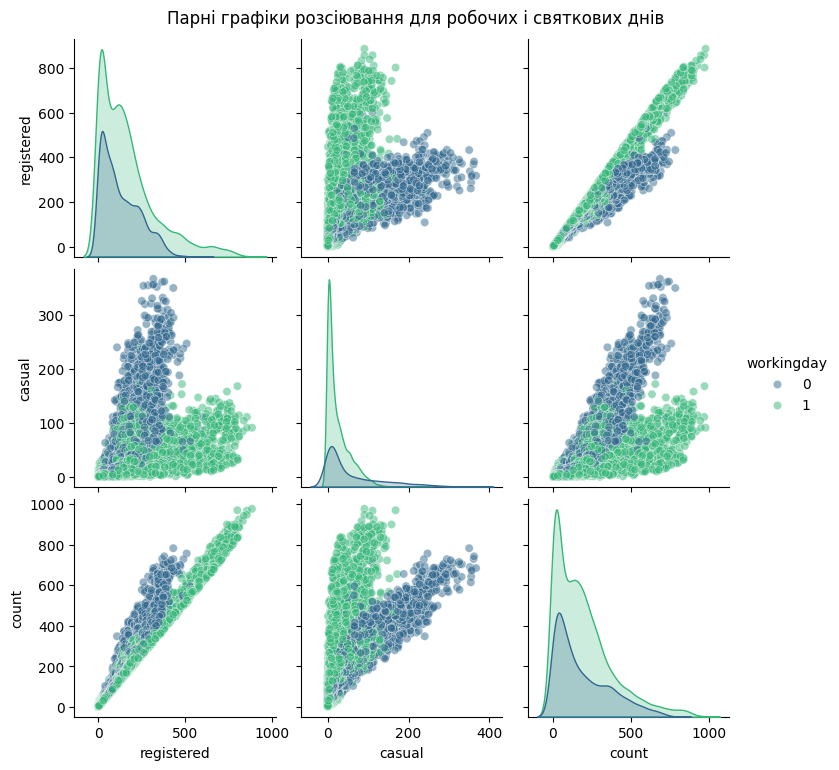

In [17]:
sns.pairplot(df, hue='workingday', vars=['registered', 'casual', 'count'], palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Парні графіки розсіювання для робочих і святкових днів', y=1.02)
plt.show()

**Висновок**:
У святкові дні кількість неформальних користувачів вища, тоді як кількість зареєстрованих користувачів зменшується, що вказує на меншу кількість робочих поїздок.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [19]:
df['date'] = df.datetime.dt.date

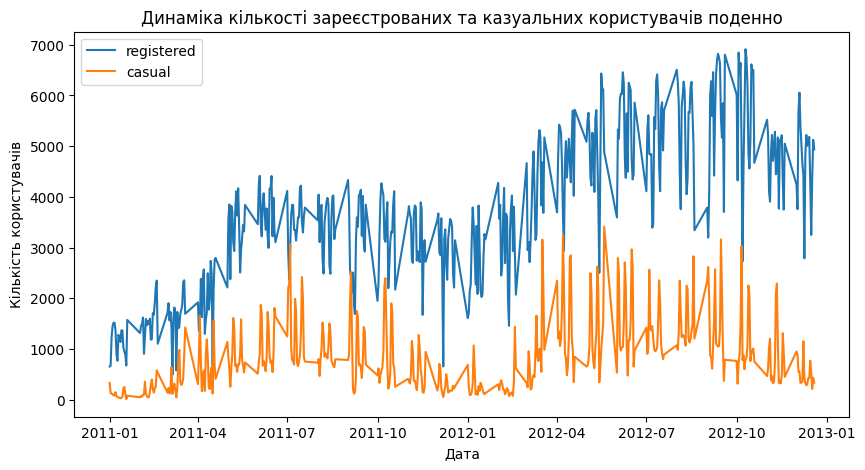

In [21]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()

# Візуалізація поденної динаміки зареєстрованих та казуальних користувачів
df_viz.plot(kind='line', figsize=(10, 5))
plt.title('Динаміка кількості зареєстрованих та казуальних користувачів поденно')
plt.xlabel('Дата')
plt.ylabel('Кількість користувачів')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
